In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.shape

(891, 12)

In [4]:
data_test.shape

(418, 11)

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Types

In [6]:
data_train.info()
print('_'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Class Distribution

In [7]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

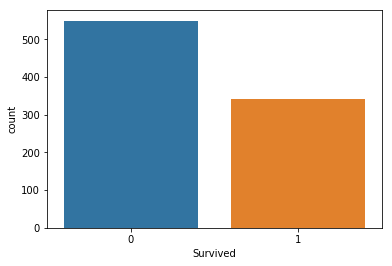

In [8]:
sns.countplot(data_train['Survived'],label="Survived")

# Numerical Features Distribution

In [9]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Categorical Features Distribution

In [10]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

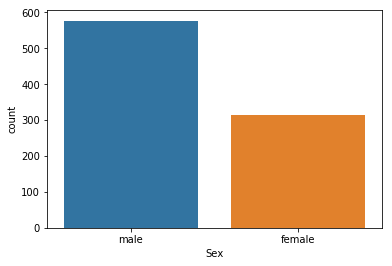

In [ ]:
sns.countplot(data_train['Sex'],label="Sex")

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x="Survived", hue="Sex", data=data_train, ax=axarr[0][0])
sns.countplot(x="Survived", hue="Embarked", data=data_train, ax=axarr[0][1])
sns.countplot(x="Survived", hue="Pclass", data=data_train, ax=axarr[1][0])

# Embarked Analysis

In [ ]:
sns.barplot(x = "Embarked", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [ ]:
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Pclass Analysis

In [ ]:
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [ ]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Sex Analysis

In [ ]:
sns.barplot(x = "Sex", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [ ]:
data_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Parch Analysis

In [ ]:
sns.countplot(x="Survived", hue="Parch", data=data_train)

In [ ]:
data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# SibSp Analysis

In [ ]:
sns.countplot(x="Survived", hue="SibSp", data=data_train)

In [ ]:
data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Age Analysis

In [ ]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(sns.distplot, 'Age')

# Fare Analysis

In [ ]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(sns.distplot, 'Fare')

# Dropping features 

In [ ]:
df_train = data_train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'Fare'], axis=1)
df_test = data_test.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'Fare'], axis=1)

In [ ]:
print("Train:", data_train.shape)
print("Test:", data_test.shape)

# Binning Continuous Features

In [ ]:
df_train['Age'] = pd.cut(df_train['Age'], bins=5, labels=["0", "1", "2", "3", "4"])
df_test['Age'] = pd.cut(df_test['Age'], bins=5, labels=["0", "1", "2", "3", "4"])

In [ ]:
df_train.head()

# Null Values

In [ ]:
print(data_test.isnull().values.any())
print(data_train.isnull().values.any())

In [ ]:
missing_df_train = data_train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['Variable', 'Somme']
missing_df_train['Pourcentage'] = round((missing_df_train['Somme'] / data_train.shape[0])*100)
missing_df_train

We can observe high percentages of missing values in the train set:
- 20% of the 'Age' instances
- 77% of the 'Cabin' instances

In [ ]:
missing_df_test = data_test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['Variable', 'Somme']
missing_df_test['Pourcentage'] = round((missing_df_test['Somme'] / data_test.shape[0])*100)
missing_df_test

We can observe high percentages of missing values in the test set:
- 21% of the 'Age' instances
- 78% of the 'Cabin' instances

## Filling Missing Values

### Age

In [ ]:
df_train['Age'].fillna(method='pad', inplace=True) 
df_train.isnull().sum()

In [ ]:
df_test['Age'].fillna(method='pad', inplace=True) 
df_test.isnull().sum()

### Embarked

In [ ]:
df_train['Embarked'].fillna(method='pad', inplace=True) 
df_train.isnull().sum()

In [ ]:
df_test['Embarked'].fillna(method='pad', inplace=True) 
df_test.head().isnull().sum()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train["Sex"] = encoder.fit_transform(df_train["Sex"])
df_test["Sex"] = encoder.fit_transform(df_test["Sex"])
df_train.head()

In [ ]:
encoder = LabelEncoder()
df_train["Embarked"] = encoder.fit_transform(df_train["Embarked"])
df_test["Embarked"] = encoder.fit_transform(df_test["Sex"])
df_train.head()

# Data Splitting

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test  = df_test.copy()
X_train.shape, Y_train.shape, X_test.shape

# Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy_knn = knn.score(X_train, Y_train)

In [ ]:
accuracy_knn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predictions = rfc.predict(X_test)
accuracy_rfc = rfc.score(X_train, Y_train)

In [ ]:
accuracy_rfc

In [ ]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": predictions
    })